<a href="https://colab.research.google.com/github/Leucocitokiller/Proyecto-Fina-NLP/blob/main/Proyecto_final_NLP_Redes_Neuronales_Libenson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importaci√≥n de Librer√≠as.

In [1]:
import urllib.request
import numpy as np
import pandas as pd
import os
import time
import sys
#-----librerias para trabajar PLN
!python -m spacy download es_core_news_md
import spacy
import es_core_news_md
#es_core_news_md Medium (modelo mediano):
#Es m√°s pesado y m√°s lento que el sm, pero mucho m√°s preciso. Tiene vectores de palabras, entiende mejor el significado de las palabras.

#-----instalaci√≥n d librerias para an√°lisis de sentimientos.
!pip install spacy spacy-transformers
!pip install pysentimiento
from pysentimiento import create_analyzer

#----librerias para normalizaci√≥n de textos
import re
from unicodedata import normalize
import unicodedata
from collections import Counter


#----librerias para graficar y wordcloud.
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

#----librer√≠as para trabajar con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
#----libreria para trabajar con BoW.
from sklearn.feature_extraction.text import CountVectorizer
#----librerias para Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.3/42.3 MB 17.6 MB/s eta 0:00:00
‚úî Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
‚ö† Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.0/44.0 kB 1.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 756.2/756.2 kB 12.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 314.0/314.0 kB 8.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚î

# Procesamiento de la Fuente de Datos.

## Conexi√≥n con la fuente de datos.


In [12]:
# Diccionario con las fuentes y sus URLs
filepath_dict = {
    'yelp': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/yelp_comentarios.csv',
    'amazon': 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/main/amazon_cells_comentarios.csv'

}

df_list = []
for source, filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['Comentario', 'Valor'], sep=';', encoding='latin-1')
    df['Origen'] = source  # Add another column filled with the source name
    df_list.append(df)

df = pd.concat(df_list)
df.head(1100)

Comentario  Valor  Origen
0                       Wow ... Me encant√≥ este lugar.      1    yelp
1                              La corteza no es buena.      0    yelp
2    No sabroso y la textura era simplemente desagr...      0    yelp
3    Me detuve durante las vacaciones de fines de m...      1    yelp
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp
..                                                 ...    ...     ...
96          Si planeas usar esto en un auto, olv√≠dalo.      0  amazon
97            Encontr√© este producto demasiado grande.      0  amazon
98   Lo mejor que he encontrado hasta ahora ... He ...      1  amazon
99             Estoy muy decepcionado con mi decisi√≥n.      0  amazon
100  Integrado a la perfecci√≥n con el tel√©fono Moto...      1  amazon

[1100 rows x 3 columns]

## Normalizaci√≥n de la Fuente de datos.


### Eliminaci√≥n de signos de puntuaci√≥n.

In [13]:
# Definici√≥n de funci√≥n para eliminar los signos de puntuaci√≥n utilizando re, pero considerando no borrar las vocales con acento.

def remove_punctuation(text):
    # Normaliza el texto a NFKD para separar letras y sus tildes
    text = unicodedata.normalize('NFKD', text)
    # Elimina los caracteres diacr√≠ticos (como las tildes)
    text = ''.join(c for c in text if not unicodedata.combining(c))
    # Elimina todo lo que no sea letras, n√∫meros o espacios
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text


# Aplicar la funci√≥n a la columna 'review_lower'
df['Comentarios'] = df['Comentario'].apply(remove_punctuation)

In [14]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  
0                           Wow  Me encanto este lugar  
1                               La corteza no es buena  
2    No sabroso y la textura era simplemente desagr...  
3    Me detuve durante las vacaciones de fines de m...  
4    La seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  La pantalla se mancha facilmente porque toca l...  
996  Que pedazo de chatarra  Pierdo mas llamadas en...  
997              El articulo no coincide con la imagen  
998  Lo Aonico que me decepciono es el puerto infra...  
999  No se puede contestar llamadas con la unidad n...  

[1999 rows x 4 columns]

### Reducir a min√∫sculas el texto.

In [15]:
# Create a new column 'Comentarios_lower' with lowercase values from 'Comentario'
df['Comentarios_lower'] = df['Comentarios'].str.lower()

In [16]:
df

Comentario  Valor  Origen  \
0                       Wow ... Me encant√≥ este lugar.      1    yelp   
1                              La corteza no es buena.      0    yelp   
2    No sabroso y la textura era simplemente desagr...      0    yelp   
3    Me detuve durante las vacaciones de fines de m...      1    yelp   
4    La selecci√≥n en el men√∫ era genial, al igual q...      1    yelp   
..                                                 ...    ...     ...   
995  La pantalla se mancha f√°cilmente porque toca l...      0  amazon   
996  Qu√© pedazo de chatarra ... Pierdo m√°s llamadas...      0  amazon   
997             El art√≠culo no coincide con la imagen.      0  amazon   
998  Lo √É¬∫nico que me decepcion√≥ es el puerto infra...      0  amazon   
999  No se puede contestar llamadas con la unidad, ...      0  amazon   

                                           Comentarios  \
0                           Wow  Me encanto este lugar   
1                               La corteza no es buena   
2    No sabroso y la textura era simplemente desagr...   
3    Me detuve durante las vacaciones de fines de m...   
4    La seleccion en el menu era genial al igual qu...   
..                                                 ...   
995  La pantalla se mancha facilmente porque toca l...   
996  Que pedazo de chatarra  Pierdo mas llamadas en...   
997              El articulo no coincide con la imagen   
998  Lo Aonico que me decepciono es el puerto infra...   
999  No se puede contestar llamadas con la unidad n...   

                                     Comentarios_lower  
0                           wow  me encanto este lugar  
1                               la corteza no es buena  
2    no sabroso y la textura era simplemente desagr...  
3    me detuve durante las vacaciones de fines de m...  
4    la seleccion en el menu era genial al igual qu...  
..                                                 ...  
995  la pantalla se mancha facilmente porque toca l...  
996  que pedazo de chatarra  pierdo mas llamadas en...  
997              el articulo no coincide con la imagen  
998  lo aonico que me decepciono es el puerto infra...  
999  no se puede contestar llamadas con la unidad n...  

[1999 rows x 5 columns]

### Convertir a n√∫mero la columna Valor para su postprocesamiento.

In [17]:
# Convertimos la columna rating a valor num√©rico
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')

In [18]:
df['Valor']

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Valor, Length: 1999, dtype: int64

# NLP

## Pre Procesamiento.

### Generaci√≥n del objeto de SPacy para utilizar en el procesamiento del texto en espa√±ol.

In [19]:
nlp = es_core_news_md.load()

### Convertir texto a min√∫sculas y Tokenizaci√≥n.

In [21]:
df['Comentarios_tokenizados'] = df['Comentarios_lower'].apply(lambda text: nlp(text))
df[['Comentarios_lower','Comentarios_tokenizados']].head()

Comentarios_lower  \
0                         wow  me encanto este lugar   
1                             la corteza no es buena   
2  no sabroso y la textura era simplemente desagr...   
3  me detuve durante las vacaciones de fines de m...   
4  la seleccion en el menu era genial al igual qu...   

                             Comentarios_tokenizados  
0                 (wow,  , me, encanto, este, lugar)  
1                       (la, corteza, no, es, buena)  
2  (no, sabroso, y, la, textura, era, simplemente...  
3  (me, detuve, durante, las, vacaciones, de, fin...  
4  (la, seleccion, en, el, menu, era, genial, al,...

### Remoci√≥n de StopWords

In [24]:
# Lista de palabras que NO queremos eliminar (tienen carga emocional)
palabras_sentimiento = {
    # Positivas
    "bueno", "buena","si","buen√≠simo", "excelentes", "excelente", "genial", "maravilloso", "maravilla", "fant√°stico", "fabuloso", "incre√≠ble",
    "perfecto", "perfecta", "agradable", "satisfecho", "satisfecha", "contento", "contenta", "encantado", "encantada",
    "amable", "simp√°tico", "simp√°tica", "r√°pido", "r√°pida", "c√≥modo", "c√≥moda", "eficaz", "eficiente", "f√°cil",
    "recomendable", "ideal", "espectacular", "feliz", "brillante", "cumpli√≥", "cumple", "funciona", "funciona bien",
    "inmejorable", "confiable", "duradero", "cumplidor", "seguro", "preciso", "elegante", "atento", "responsable",
    "acertado", "destacado", "excepcional", "impecable", "sensacional", "√∫til", "accesible", "econ√≥mico", "funcional",
    "intuitivo", "conveniente", "hermoso", "linda", "precioso", "excelente calidad", "vale la pena",

    # Negativas
    "malo","no", "mala", "mal", "p√©simo", "p√©sima","nunca", "horrible", "fatal", "insoportable", "lento", "lenta", "inc√≥modo", "inc√≥moda",
    "decepcionante", "decepcionado", "decepcionada", "sucio", "sucia", "caro", "cara", "in√∫til", "deficiente", "desagradable",
    "complicado", "problem√°tico", "estafa", "enga√±ado", "enga√±ada", "roto", "rota", "desastroso", "error", "errores",
    "retraso", "tardanza", "fr√°gil", "inestable", "poco fiable", "nunca m√°s", "no volver√©", "no recomiendo", "no sirve",
    "no funciona", "arruinado", "fall√≥", "fallando", "demora", "p√©sima atenci√≥n", "servicio malo", "mala calidad", "molesto",
    "defecto", "problemas", "fallas", "sin sentido", "basura", "p√©rdida de dinero", "decepci√≥n"
}

# Actualizamos spaCy para que NO considere esas palabras como stopwords
for palabra in palabras_sentimiento:
    lex = nlp.vocab[palabra]
    lex.is_stop = False



def parse_and_remove_stopwords(doc):
    """
    Remueve las stopwords de un objeto spaCy Doc.
    """
    # Filtrar stopwords y obtener los tokens como texto
    tokens_filtrados = [token.text for token in doc if not token.is_stop]
    return tokens_filtrados

# Aplicar la funci√≥n al DataFrame
df['Comentarios_sin_StopWords'] = df['Comentarios_tokenizados'].apply(parse_and_remove_stopwords)

df[['Comentarios_tokenizados','Comentarios_sin_StopWords']].head()

Comentarios_tokenizados  \
0                 (wow,  , me, encanto, este, lugar)   
1                       (la, corteza, no, es, buena)   
2  (no, sabroso, y, la, textura, era, simplemente...   
3  (me, detuve, durante, las, vacaciones, de, fin...   
4  (la, seleccion, en, el, menu, era, genial, al,...   

                           Comentarios_sin_StopWords  
0                           [wow,  , encanto, lugar]  
1                               [corteza, no, buena]  
2  [no, sabroso, textura, simplemente, desagradable]  
3  [detuve, vacaciones, fines, mayo, recomendacio...  
4                 [seleccion, menu, genial, precios]

### Lematizado.

In [25]:
def lematizar_sin_stopwords(doc):
    """
    Devuelve una lista de lemas excluyendo las stopwords.

    Par√°metro:
    - doc: objeto spaCy Doc

    Retorna:
    - Lista de lemas (str) sin stopwords
    """
    return [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Aplicar la funci√≥n y guardar el resultado en una nueva columna
df['Comentarios_lema'] = df['Comentarios_tokenizados'].apply(lematizar_sin_stopwords)

df[['Comentarios_tokenizados','Comentarios_lema']].head(20)

Comentarios_tokenizados  \
0                  (wow,  , me, encanto, este, lugar)   
1                        (la, corteza, no, es, buena)   
2   (no, sabroso, y, la, textura, era, simplemente...   
3   (me, detuve, durante, las, vacaciones, de, fin...   
4   (la, seleccion, en, el, menu, era, genial, al,...   
5   (ahora, me, estoy, enojando, y, quiero, mi, ma...   
6              (honestamente, no, sabia, tan, fresco)   
7   (las, papas, eran, como, caucho, y, se, notaba...   
8     (las, patatas, fritas, tambien, eran, geniales)   
9                                   (un, gran, toque)   
10                   (el, servicio, fue, muy, rapido)   
11                                     (no, volveria)   
12  (al, cajero, no, le, importaba, lo, que, fuera...   
13  (probe, el, ravoli, de, cape, cod, pollo, con,...   
14  (estaba, disgustado, porque, estaba, bastante,...   
15  (me, sorprendio, porque, no, hay, signos, que,...   
16                                (muy, recomendable)   
17  (la, camarera, fue, un, poco, lento, en, el, s...   
18  (este, lugar, no, vale, la, pena, su, tiempo, ...   
19                      (no, me, gusto, en, absoluto)   

                                     Comentarios_lema  
0                              [wow, encantar, lugar]  
1                                 [corteza, no, buen]  
2   [no, sabroso, textura, simplemente, desagradable]  
3   [detener, vacaci√≥n, fines, mayo, recomendaci√≥n...  
4                   [seleccion, menu, genial, precio]  
5                      [enojar, querer, maldito, pho]  
6                   [honestamente, no, sabio, fresco]  
7   [papa, caucho, notar, habiar, preparar, tiempo...  
8                             [patata, frita, genial]  
9                                             [toque]  
10                                 [servicio, rapido]  
11                                    [no, volveriar]  
12                [cajero, no, importar, tenia, caro]  
13  [probe, ravoli, cape, cod, pollo, arandano, mmmm]  
14              [disgustado, seguro, cabello, humano]  
15         [sorprender, no, signo, indicar, efectivo]  
16                                     [recomendable]  
17                        [camarera, lento, servicio]  
18             [lugar, no, valer, pena, tiempo, vega]  
19                             [no, gustar, absoluto]

## Procesamiento

### Conteo de Palabras mas comunes.

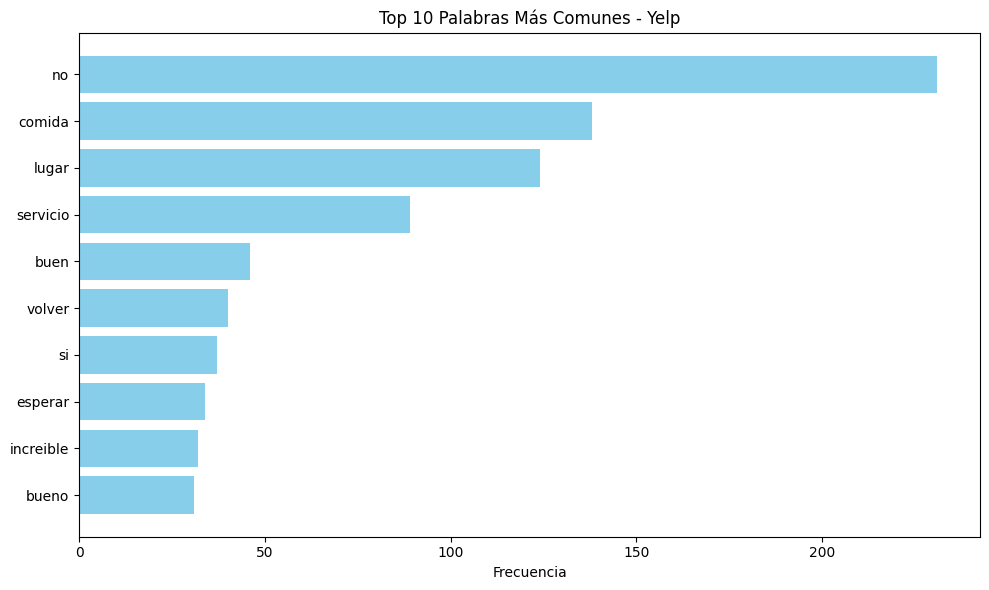

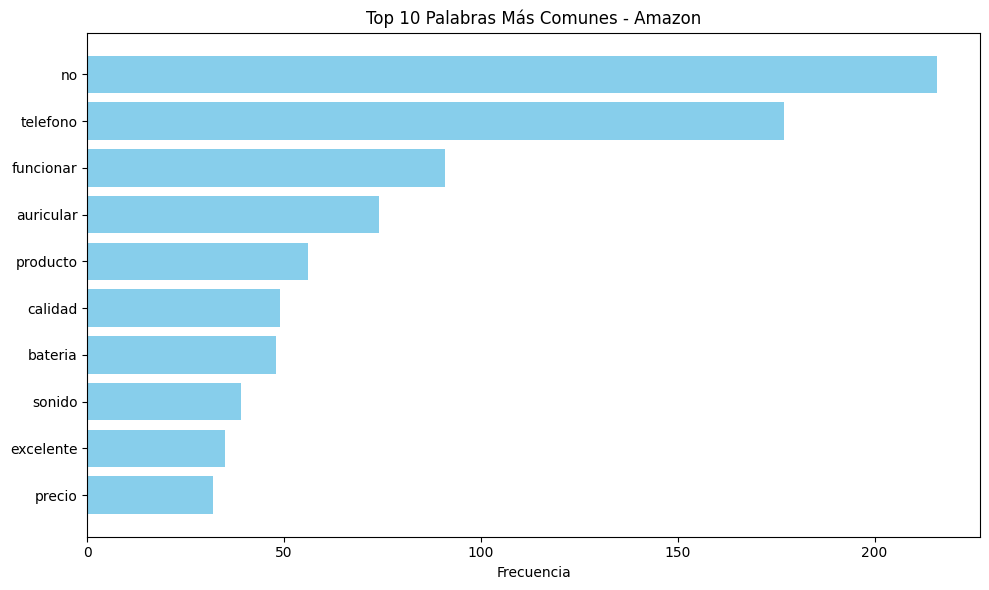

In [27]:
def graficar_palabras_comunes(df, origen, top_n=10):
    # Filtrar y aplanar los lemas
    lemas = [lema for lemas in df[df['Origen'] == origen]['Comentarios_lema'] for lema in lemas]
    conteo = Counter(lemas).most_common(top_n)

    # Separar palabras y frecuencias
    palabras, frecuencias = zip(*conteo)

    # Crear gr√°fico
    plt.figure(figsize=(10, 6))
    plt.barh(palabras, frecuencias, color='skyblue')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {top_n} Palabras M√°s Comunes - {origen.capitalize()}')
    plt.gca().invert_yaxis()  # Poner la palabra m√°s com√∫n arriba
    plt.tight_layout()
    plt.show()

# Graficar para Yelp
graficar_palabras_comunes(df, 'yelp')

# Graficar para Amazon
graficar_palabras_comunes(df, 'amazon')

### Conteo de bigramas m√°s comunes.

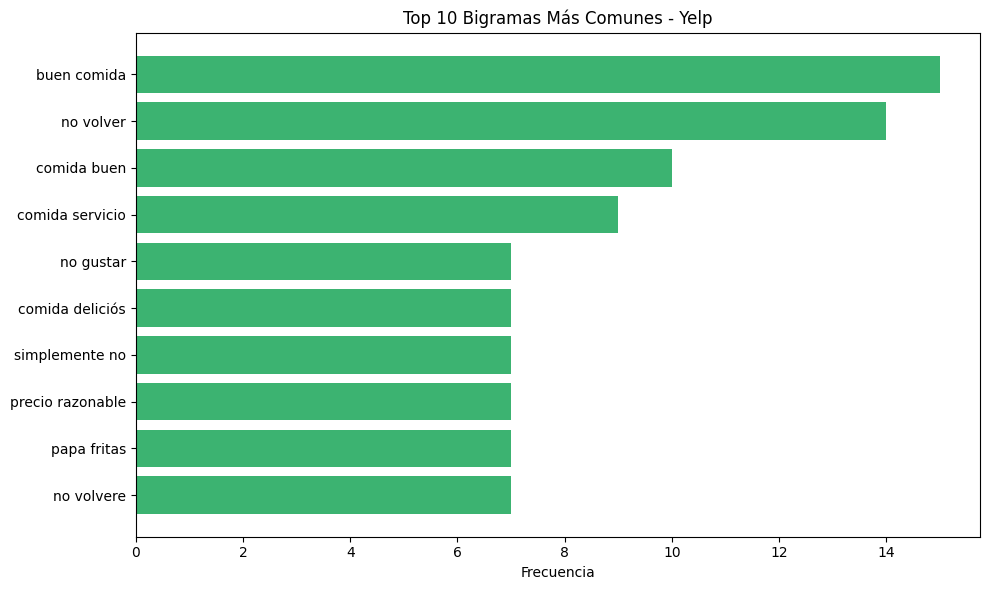

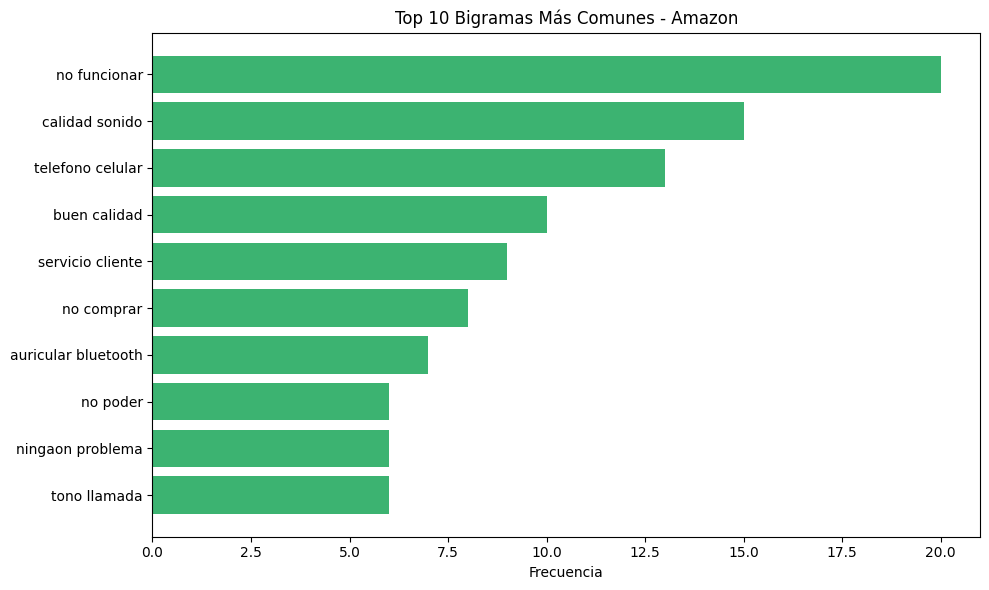

In [26]:
from collections import Counter
from itertools import tee
import matplotlib.pyplot as plt

def generar_bigramas(lista):
    """Devuelve bigramas como tuplas a partir de una lista de palabras"""
    a, b = tee(lista)
    next(b, None)
    return list(zip(a, b))

def graficar_bigramas_comunes(df, origen, top_n=10):
    # Filtrar solo los comentarios del origen y generar bigramas
    bigramas = [
        bigrama
        for lemas in df[df['Origen'] == origen]['Comentarios_lema']
        for bigrama in generar_bigramas(lemas)
    ]

    conteo = Counter(bigramas).most_common(top_n)

    # Convertir tuplas de bigramas a string para graficar
    etiquetas = [' '.join(b) for b, _ in conteo]
    frecuencias = [f for _, f in conteo]

    # Crear gr√°fico
    plt.figure(figsize=(10, 6))
    plt.barh(etiquetas, frecuencias, color='mediumseagreen')
    plt.xlabel('Frecuencia')
    plt.title(f'Top {top_n} Bigramas M√°s Comunes - {origen.capitalize()}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
graficar_bigramas_comunes(df, 'yelp')
graficar_bigramas_comunes(df, 'amazon')


### WordClouds

#### WordCloud Yelp.

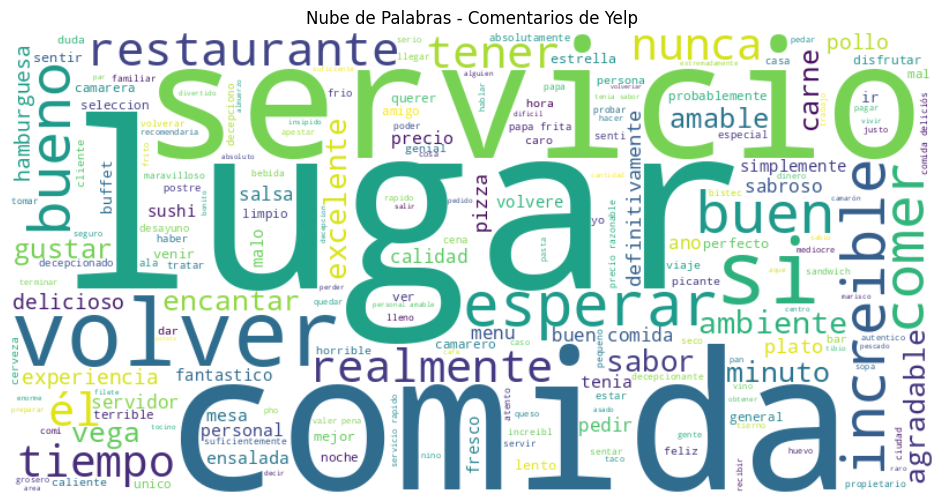

In [28]:
# Filtrar el DataFrame
df_yelp = df[df['Origen'] == 'yelp']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_yelp = ' '.join([' '.join(lemas) for lemas in df_yelp['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_yelp)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()

#### WordCloud Amazon.

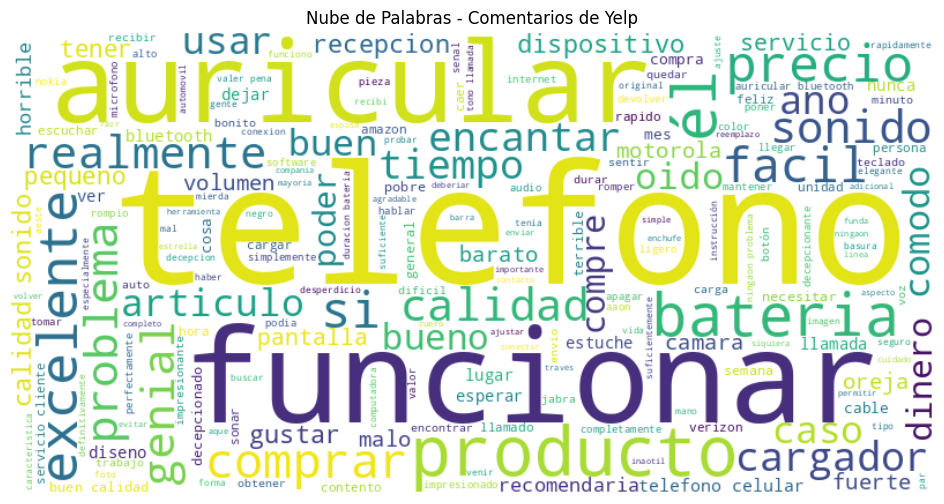

In [29]:
# Filtrar el DataFrame
df_amazon = df[df['Origen'] == 'amazon']

# Unir todos los lemas en un solo string (comentarios lematizados ya est√°n en listas)
texto_amazon = ' '.join([' '.join(lemas) for lemas in df_amazon['Comentarios_lema']])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_amazon)

# Mostrar la nube
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras - Comentarios de Yelp")
plt.show()


#### WordCloud + Bigramas.

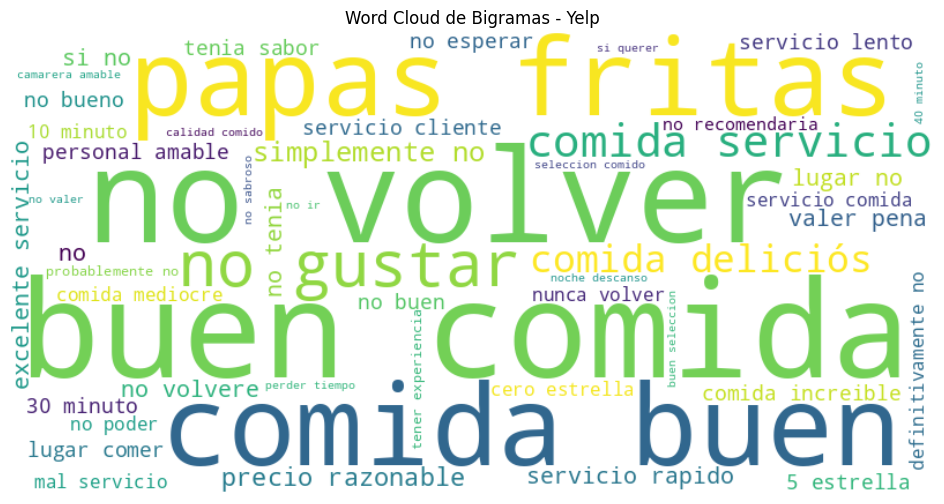

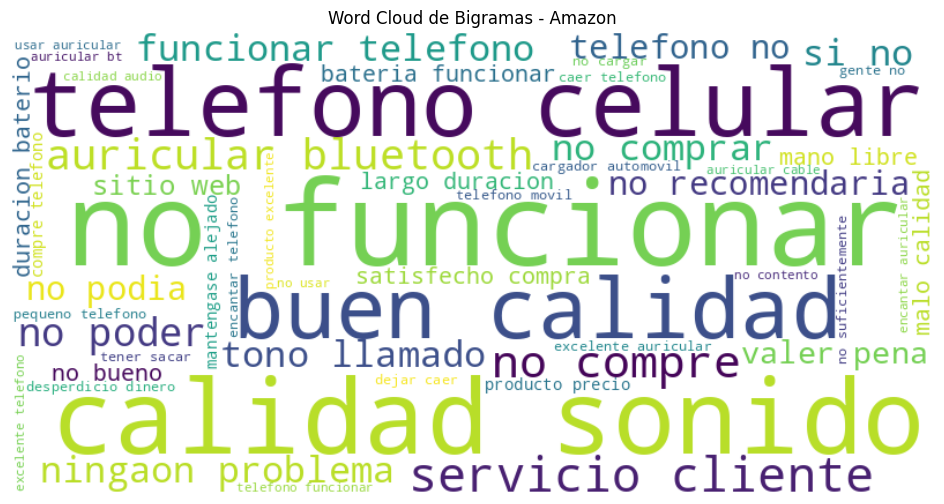

In [47]:
def generar_bigramas_spacy(df, origen, top_n=50):
    """
    Genera bigramas usando spaCy a partir de la columna 'Comentarios_Lema', sin stopwords.
    Luego genera una nube de palabras.
    """
    # Filtrar los comentarios por 'origen' (por ejemplo, 'yelp' o 'amazon')
    comentarios = df[df['Origen'] == origen]['Comentarios_sin_StopWords']

    # Generar bigramas
    bigramas = []
    for comentario in comentarios:
        # Crear un Doc de spaCy a partir de la lista de lemas (de la columna 'Comentarios_Lema')
        doc = nlp(' '.join(comentario))  # Unimos la lista de lemas y lo procesamos con spaCy
        # Extraer bigramas
        for i in range(len(doc) - 1):
            if not doc[i].is_stop and not doc[i+1].is_stop:  # Asegurarse de que no sean stopwords
                bigramas.append((doc[i].lemma_, doc[i+1].lemma_))

    # Contar los bigramas m√°s comunes
    conteo_bigramas = Counter(bigramas).most_common(top_n)

    # Convertir los bigramas a formato texto "palabra1 palabra2"
    bigramas_texto = {' '.join(bigrama): freq for bigrama, freq in conteo_bigramas}

    # Generar la nube de palabras de los bigramas
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigramas_texto)

    # Mostrar la nube
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud de Bigramas - {origen.capitalize()}")
    plt.show()

# Generar la nube de bigramas para Yelp y Amazon
generar_bigramas_spacy(df, 'yelp')
generar_bigramas_spacy(df, 'amazon')

### üöÄ An√°lisis de sentimiento en espa√±ol con pysentimiento

In [32]:
# Crear analizador de sentimientos
analyzer = create_analyzer(task="sentiment", lang="es")

# Aplicar a una columna de texto
df['Sentimiento'] = df['Comentario'].apply(lambda x: analyzer.predict(x).output)
# Sentimiento solo guarda lo predicho (POS, NEU o NEG)

df['Probabilidad'] = df['Comentario'].apply(lambda x: analyzer.predict(x).probas)
#Ese diccionario contiene la probabilidad de cada clase: positivo, neutro, negativo Ejemplo: {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06}.

#### üìä  Gr√°fico de barras de frecuencia de sentimientos

<ipython-input-33-8869e27892cb>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')


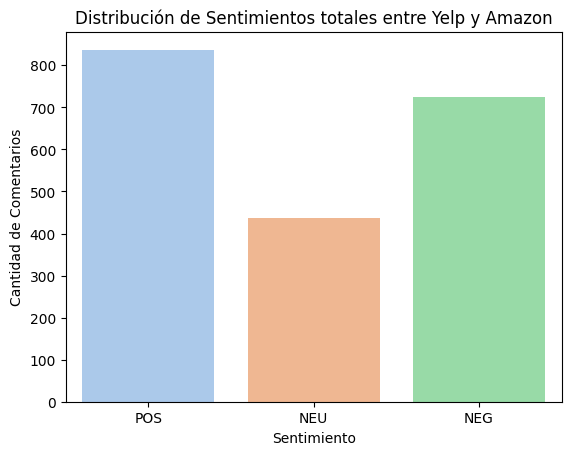

In [33]:
sns.countplot(data=df, x='Sentimiento', order=['POS', 'NEU', 'NEG'], palette='pastel')
plt.title('Distribuci√≥n de Sentimientos totales entre Yelp y Amazon')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()


#### Distribuci√≥n de los sentimientos.

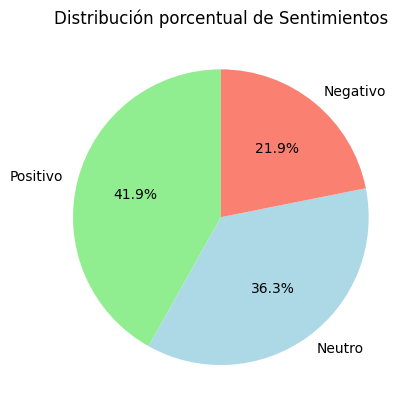

In [34]:
df['Sentimiento'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Positivo', 'Neutro', 'Negativo'],
    colors=['lightgreen', 'lightblue', 'salmon']
)
plt.title('Distribuci√≥n porcentual de Sentimientos')
plt.ylabel('')
plt.show()

#### An√°lisis de Confianza para filtrar comentarios con baja certeza

In [35]:
# M√°xima probabilidad (nivel de certeza del modelo)
df['Confianza'] = df['Probabilidad'].apply(lambda x: max(x.values()))  # En este caso, de la lista {'POS': 0.84, 'NEU': 0.10, 'NEG': 0.06} s√≥lo guarda 0.84 que es el valor mayor

# Filtrar comentarios cuya confianza sea menor a 0.6
comentarios_baja_confianza = df[df['Confianza'] < 0.6]
comentarios_alta_confianza = df[df['Confianza'] >= 0.6]
# Ver los primeros resultados
#comentarios_baja_confianza[['Comentarios', 'Sentimiento', 'Confianza']]

#### Distribuci√≥n de los comentarios filtrados.

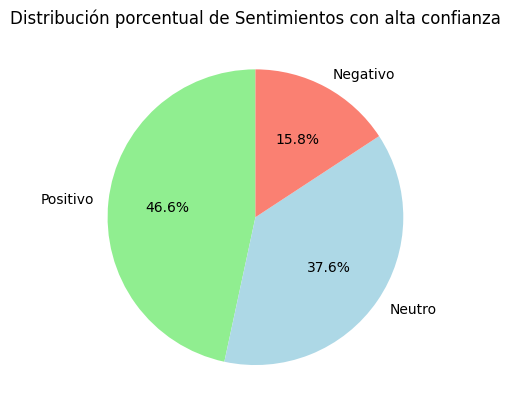

In [38]:
df[df['Confianza'] >= 0.6]['Sentimiento'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Positivo', 'Neutro', 'Negativo'],
    colors=['lightgreen', 'lightblue', 'salmon']
)
plt.title('Distribuci√≥n porcentual de Sentimientos con alta confianza')
plt.ylabel('')
plt.show()

#### Distribuci√≥n de la Confianza de los comentarios.

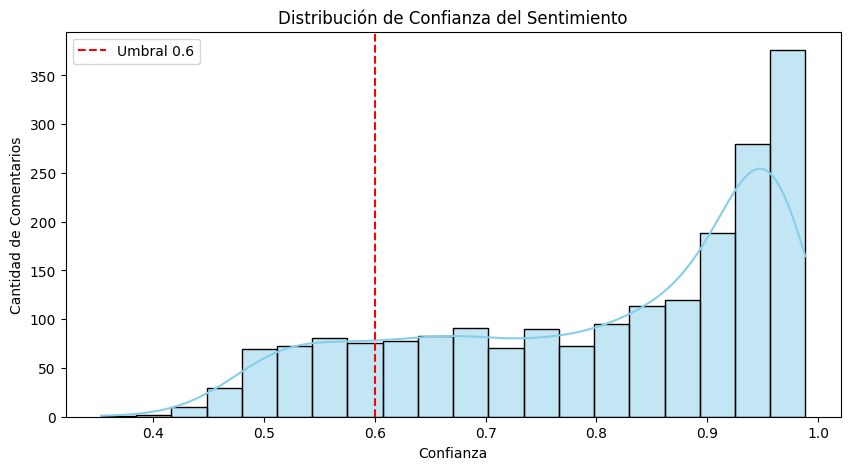

In [39]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Confianza', bins=20, kde=True, color='skyblue')
plt.axvline(0.6, color='red', linestyle='--', label='Umbral 0.6')
plt.title('Distribuci√≥n de Confianza del Sentimiento')
plt.xlabel('Confianza')
plt.ylabel('Cantidad de Comentarios')
plt.legend()
plt.show()

# Pruebas de Modelos de Machine Learning.

## Regresi√≥n Log√≠stica.

### Utilizando TF-IFD.

TF-IDF (Term Frequency - Inverse Document Frequency) es una t√©cnica de procesamiento de texto utilizada para evaluar la importancia de una palabra dentro de un conjunto de documentos. Se basa en dos conceptos:

TF (Frecuencia de T√©rmino): Mide cu√°ntas veces aparece un t√©rmino en un documento espec√≠fico, comparado con el n√∫mero total de t√©rminos en ese documento. Esto ayuda a capturar cu√°n relevante es una palabra dentro de un documento en particular.

IDF (Frecuencia Inversa de Documentos): Mide la importancia de una palabra dentro de un conjunto de documentos. Si una palabra aparece en muchos documentos, tiene menos valor. La f√≥rmula es:

Esto ayuda a reducir el peso de las palabras que aparecen frecuentemente en todos los documentos (como "el", "y", "de"), ya que no agregan mucha informaci√≥n.

As√≠, la importancia de un t√©rmino en un documento depende tanto de su frecuencia en ese documento como de cu√°n com√∫n es en todo el conjunto de documentos.

In [44]:
 # TFIDF espera trabajar con strings y  no listas, por lo que se procede a crear una nueva columna con los datos tokenizados en formato str.
df['Comentarios_token_str'] = df['Comentarios_sin_StopWords'].apply(lambda x: ' '.join(x))


### C√°lculo de TF-IDF con TfidVetorizer.

In [45]:
# Crear el vectorizador
tfidfvectorizer = TfidfVectorizer(ngram_range=(1,3))
#inlcuyo bigramas y trigramas para que le de contexto a los comentarios. Esto me permite ver un "No conforme" y no solamente le "No" y el "Conforme" por separado.

# Ajustar y transformar
tfidf_matrix = tfidfvectorizer.fit_transform(df['Comentarios_token_str'])

# Obtener los t√©rminos
features = tfidfvectorizer.get_feature_names_out()

# Convertir la matriz a DataFrame
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=features)

# Sumar TF-IDF por columna
tfidf_scores = df_tfidf.sum().sort_values(ascending=False)

# Mostrar top 10
print("üîù Top 10 n-gramas por score TF-IDF:")
print(tfidf_scores.head(10).round(3))




üîù Top 10 n-gramas por score TF-IDF:
no          54.470
telefono    32.875
servicio    23.779
comida      22.994
lugar       22.895
producto    17.442
funciona    17.354
buena       15.276
calidad     12.612
precio      11.964
dtype: float64


In [46]:
# Crear un DataFrame auxiliar con el tipo de n-grama
df_scores = pd.DataFrame({
    'ngram': tfidf_scores.index,
    'score': tfidf_scores.values,
    'tipo': tfidf_scores.index.to_series().apply(lambda x: f'{len(x.split())}-grama')
})

# Ver los 5 m√°s importantes por tipo
top_n = 5
for tipo in ['1-grama', '2-grama', '3-grama']:
    print(f"\nüîù Top {top_n} {tipo}s:")
    print(df_scores[df_scores['tipo'] == tipo].head(top_n).to_string(index=False))


üîù Top 5 1-gramas:
   ngram     score    tipo
      no 54.469626 1-grama
telefono 32.874651 1-grama
servicio 23.779208 1-grama
  comida 22.993750 1-grama
   lugar 22.894560 1-grama

üîù Top 5 2-gramas:
           ngram    score    tipo
      no volvere 4.415488 2-grama
   no volveremos 4.333206 2-grama
     no funciona 4.185172 2-grama
servicio cliente 4.137256 2-grama
    buena comida 4.025699 2-grama

üîù Top 5 3-gramas:
                    ngram    score    tipo
    buena comida servicio 1.658375 3-grama
    no recomendaria lugar 1.256881 3-grama
             no vale pena 1.196722 3-grama
servicio cliente terrible 1.117075 3-grama
       no compre producto 1.031673 3-grama


## Redes Neuronales.